# Fish Species Classifier: An Advanced Analytical Approach

*By Donal Moloney*

## Executive Summary

In the realm of aquatic biodiversity, fishes present a vast array of species, each unique in its characteristics. As part of this investigative endeavor titled "Fish Species Classification: An Advanced Analytical Approach", we leverage sophisticated data analytics and machine learning algorithms to categorize and understand fish species from a curated dataset derived from a fish market.

This scientific pursuit aims to not only contribute to the academic realms of marine biology and aquatic ecology but also to provide practical tools for sustainable fisheries management and conservation initiatives.

## Key Objectives

Our approach is multifaceted and encompasses the following objectives:

1. **Data Inspection**: Initiate a thorough examination of the dataset to comprehend its granularity, structure, and inherent features.
 
2. **Advanced Feature Synthesis**: Enhance the dataset's predictive potential by generating novel attributes. A highlight is the derivation of the Body Mass Index (BMI) for fishes, potentially providing a nuanced perspective on species classification.

3. **Data Visualization Techniques**: Implement advanced visual analytics, employing methodologies like scatter plots, box plots, and correlation matrices to unravel potential patterns and relationships within the dataset.

4. **Machine Learning Implementation**: Opt for the robust ensemble technique, Random Forest Classifier, as our primary predictive tool. Rigorous training, validation, and fine-tuning form the crux of our analytical approach.

5. **Model Reliability Assessment**: Employ k-fold cross-validation to ascertain the consistency and reliability of our classification model across various data partitions.

6. **Optimization Through Hyperparameter Tuning**: Utilize GridSearchCV for exhaustive hyperparameter optimization, enhancing the model's predictive prowess.

7. **Comprehensive Model Assessment**: Conduct a detailed diagnostic analysis of the model's output, focusing on metrics such as precision, recall, and F1-score, complemented with a confusion matrix for a granular performance evaluation.


Let's dive in!

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from IPython.display import Image

In [31]:
# Data Ingestion
df = pd.read_csv("Fish.csv")

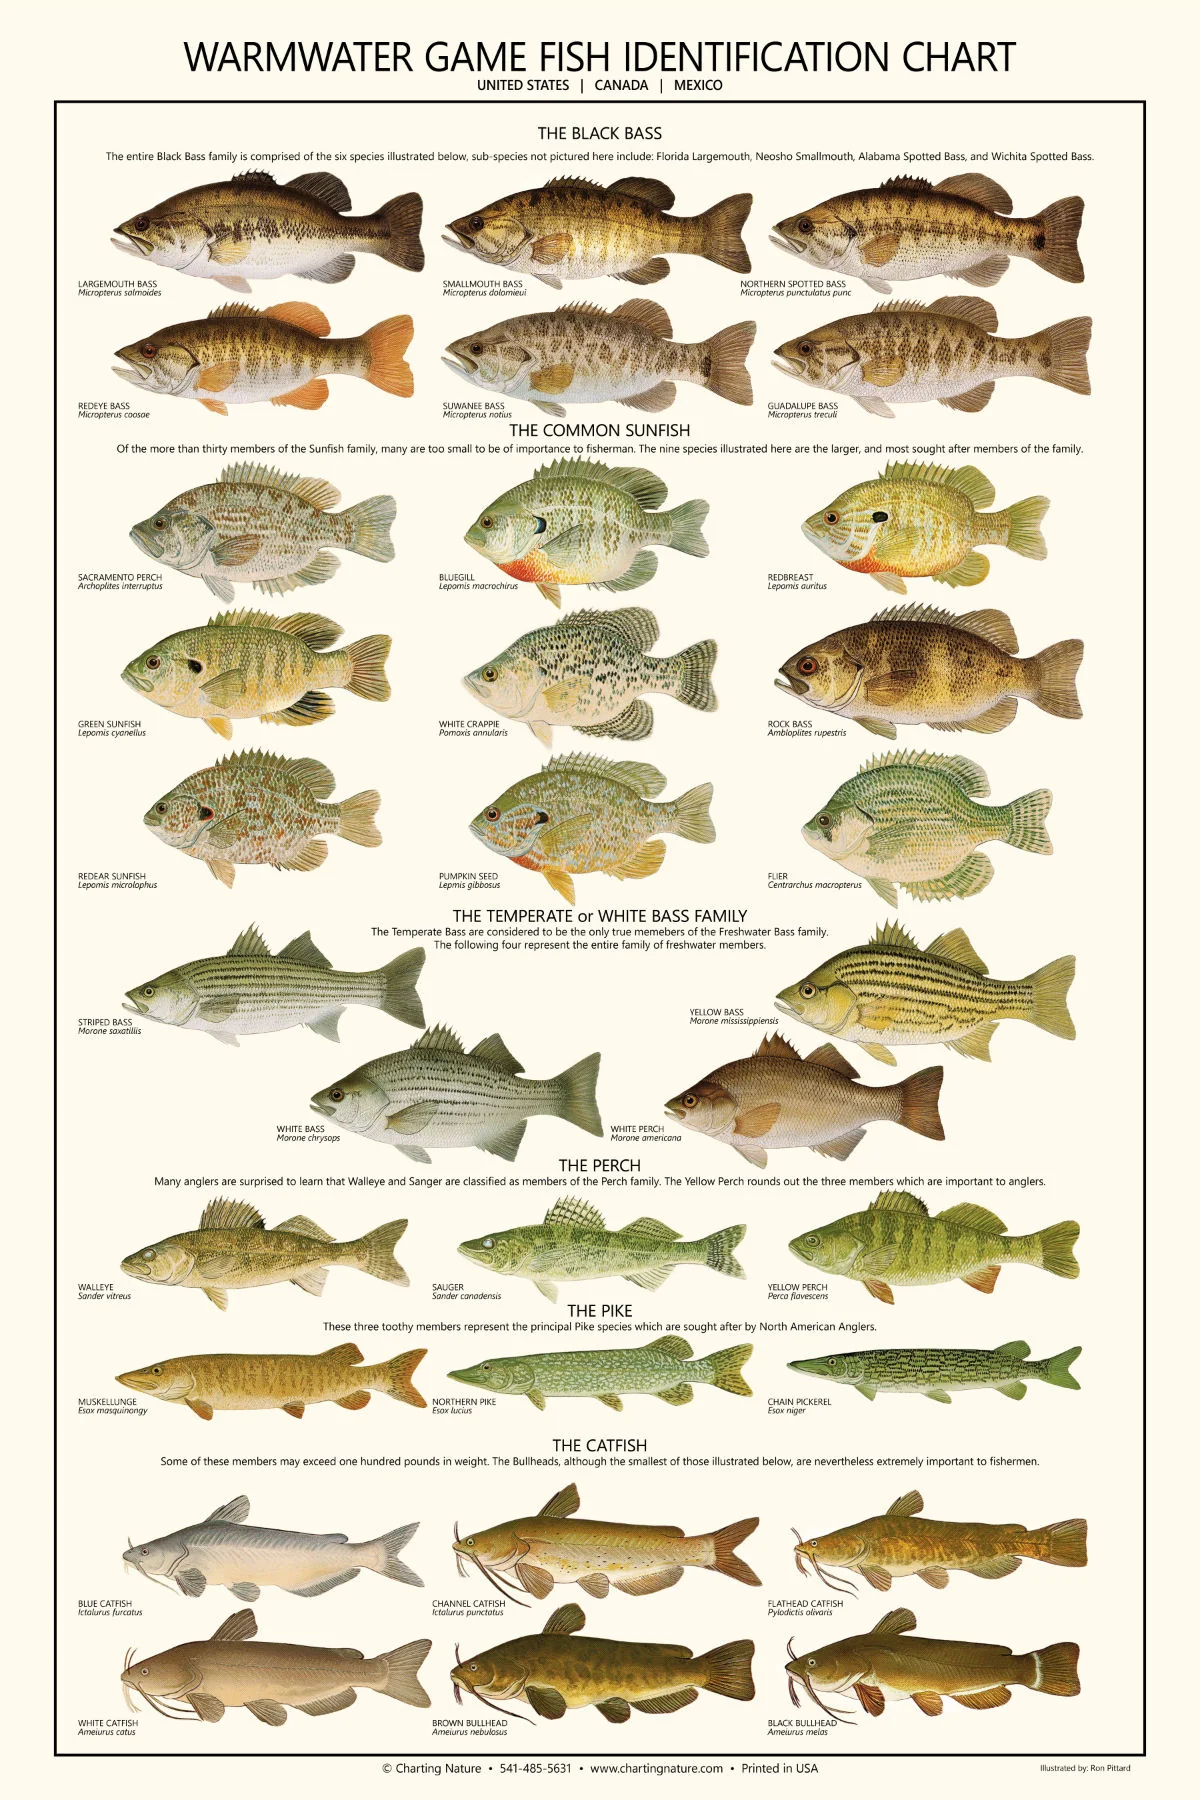

In [32]:
Image(filename="fishposter.jpg")

In [33]:
# Section: Data Exploration:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


Analysis:
    The dataset's makeup of 159 entries with 7 columns suggests a compact data source. With no missing values, the stage is set for efficient analysis without additional preprocessing for null entries.

In [34]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(df.head())


First Few Rows of the Dataset:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Analysis:
    "Bream" is the species you showcased in the data glimpse. Notably, there's a set of lengths (Length1, Length2, Length3) accompanying weight, height, and width. The consistency in units is implied, but it would be beneficial to further verify this.

In [35]:
# Summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


Analysis:
Weight - The substantial variation from 0 to 1650 units implies differing fish sizes or species types, potentially highlighting the diversity in the dataset.

Lengths - The increasing trend in lengths might suggest different measurement points on the fish. Given that these lengths average between 26.25 to 31.23 units, this might be an avenue to explore specific growth patterns among the species.

Height & Width - Their average values highlight the potential morphology of the fishes, perhaps indicating certain species have a broader or taller build.

In [36]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


Analysis: On inspection, it's evident that the dataset is devoid of any missing values across all columns, from 'Species' to 'Width'. This is a favorable starting point as it eliminates the immediate need for data imputation strategies, ensuring a straightforward analysis and modeling process without concerns over data gaps.

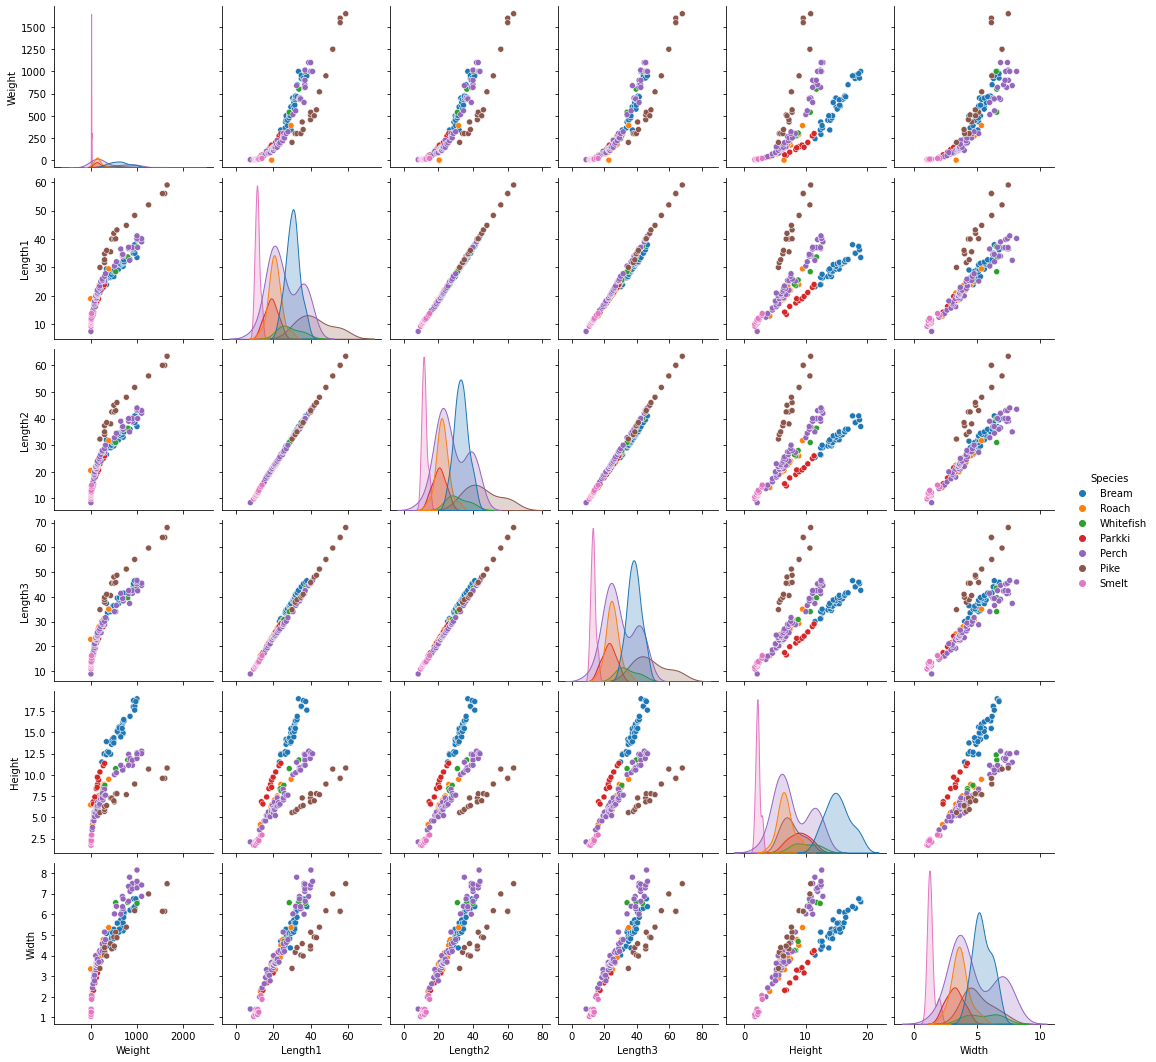

In [37]:
# Section: Data Visualization:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()

Analysis:
Pairplot from your visualization:
    Bream: Distinct clustering for higher weight and length attributes might mean that Breams are generally larger.
    Smelt: Their clustering at the lower weight spectrum might indicate them as a smaller species, perhaps more streamlined.
    Perch: The spread of attributes for Perch hints at significant variability within this species, potentially making them a bit challenging to classify solely based on these measurements.

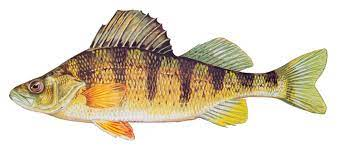

In [38]:
Image(filename="perch.jpeg")

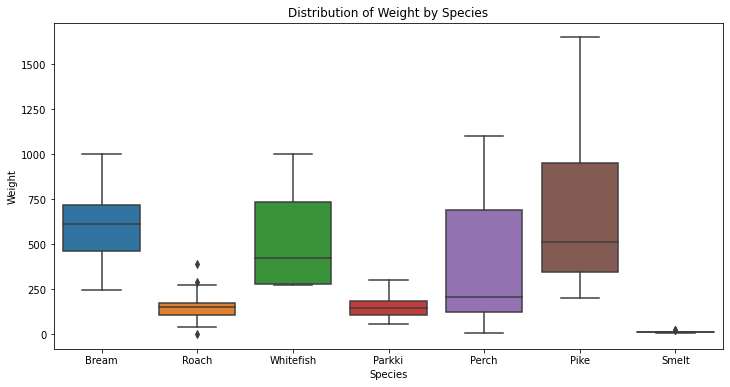

In [39]:
# Boxplot to visualize the distribution of numerical features by species
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Species', y='Weight')
plt.title('Distribution of Weight by Species')
plt.show()

In [40]:
# Calculate statistics for each species
grouped = df.groupby('Species')['Weight']

# Median
medians = grouped.median()

# First quartile (Q1)
q1 = grouped.quantile(0.25)

# Third quartile (Q3)
q3 = grouped.quantile(0.75)

# Interquartile range (IQR)
iqr = q3 - q1

# Potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Weight statistics by species:\n")
for species, weight in grouped:
    outliers = weight[(weight < lower_bound[species]) | (weight > upper_bound[species])].values
    print(f"{species} - Median: {medians[species]:.2f}, Q1: {q1[species]:.2f}, Q3: {q3[species]:.2f}, Potential Outliers: {outliers}")

Weight statistics by species:

Bream - Median: 610.00, Q1: 462.50, Q3: 717.00, Potential Outliers: []
Parkki - Median: 145.00, Q1: 105.00, Q3: 185.00, Potential Outliers: []
Perch - Median: 207.50, Q1: 120.00, Q3: 692.50, Potential Outliers: []
Pike - Median: 510.00, Q1: 345.00, Q3: 950.00, Potential Outliers: []
Roach - Median: 147.50, Q1: 104.25, Q3: 171.75, Potential Outliers: [  0. 290. 390.]
Smelt - Median: 9.85, Q1: 8.95, Q3: 12.20, Potential Outliers: [19.7 19.9]
Whitefish - Median: 423.00, Q1: 279.00, Q3: 735.00, Potential Outliers: []


Analysis: Bream:

    The Bream species seems to be heavier on average, with a median weight of 610.00 units.
    Half of the Bream fishes weigh between 462.50 units and 717.00 units, which is a relatively tight range given the median, indicating consistent weight patterns within this species.
    No potential outliers were detected, suggesting that the weight distribution of Bream is relatively homogeneous.

Parkki:

    Parkki species have a median weight of 145.00 units, which is towards the lower end compared to other species like Bream.
    The range from Q1 to Q3 indicates that most Parkki fishes are in the 105.00 to 185.00 weight range.
    There are no potential outliers, hinting at a consistent weight pattern for Parkki species.

Perch:

    The median weight for Perch is 207.50 units.
    However, the considerable gap between Q1 (120.00 units) and Q3 (692.50 units) suggests a broad weight distribution, possibly indicating that Perch can vary greatly in size.
    No specific outliers were detected, but given the wide interquartile range, it's clear that Perch has a diverse weight range.

Pike:

    Pike has a median weight of 510.00 units, suggesting that it's one of the heavier species, though not as heavy as the Bream on average.
    Most Pike fishes seem to lie between 345.00 units and 950.00 units in weight.
    No potential outliers were detected.

Roach:

    Roach has a median weight close to Parkki at 147.50 units.
    Most Roach fishes weigh between 104.25 units and 171.75 units.
    There are a few potential outliers at 0, 290, and 390 units, which might indicate either exceptionally small or large Roach compared to the majority. The 0 unit might need further investigation, as it might be a data entry error or an unusually small specimen.

Smelt:

    Smelt is the lightest species on average, with a median weight of just 9.85 units.
    The interquartile range is also tight, between 8.95 units and 12.20 units, suggesting most Smelt fishes are very close in weight.
    There are two potential outliers at 19.7 and 19.9 units, indicating some Smelt fishes that are significantly heavier than the majority.

Whitefish:

    Whitefish has a median weight of 423.00 units.
    Most Whitefish lie in the weight range of 279.00 to 735.00 units.
    No potential outliers were detected.

Overall Insights:

    The weight distribution differs significantly among species. Species like Bream and Pike are heavier on average, while species like Smelt and Parkki are lighter.
    The weight distribution within a species can vary. For instance, Perch has a broad weight distribution, while Smelt has a tight range.
    Outliers, like those in Roach and Smelt, offer valuable insights. They might represent rare specimens, data entry errors, or unique sub-species. Further investigation would be useful to understand these better.

These weight-based insights, combined with other features, can be instrumental in developing a robust classification model. The weight feature might especially be influential in distinguishing between light species like Smelt and heavier species like Bream or Pike.

In [41]:
# Feature Engineering: Calculate BMI and create a scatter plot
df['BMI'] = df['Weight'] / ((df['Length1'] + df['Length2'] + df['Length3']) / 3)

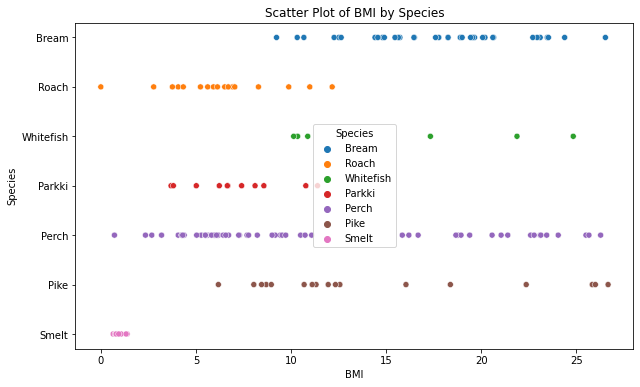

In [42]:
# Scatter plot to visualize the relationship between BMI and species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Species', hue='Species')
plt.title('Scatter Plot of BMI by Species')
plt.show()

In [43]:
# Generate a summary of BMI for each species
bmi_summary = df.groupby('Species')['BMI'].describe()

# Display the summary
print(bmi_summary)

           count       mean       std        min        25%        50%  \
Species                                                                  
Bream       35.0  17.790992  4.286280   9.236641  14.854245  18.255578   
Parkki      11.0   7.120910  2.511961   3.691275   5.623481   6.677266   
Perch       56.0  11.428263  7.603276   0.716599   5.593483   7.996256   
Pike        17.0  14.445652  6.850087   6.179197   8.961039  11.953125   
Roach       20.0   6.353774  2.757465   0.000000   5.012458   6.605503   
Smelt       14.0   0.904545  0.224132   0.650155   0.764941   0.842936   
Whitefish    6.0  15.899628  6.432574  10.137672  10.477815  14.101490   

                 75%        max  
Species                          
Bream      20.401713  26.525199  
Parkki      8.339768  11.392405  
Perch      18.809337  26.273885  
Pike       18.375242  26.666667  
Roach       7.030968  12.162162  
Smelt       0.975111   1.384075  
Whitefish  20.739937  24.834437  


Analysis: The provided table is a statistical summary of the Body Mass Index (BMI) for each fish species in the dataset. This kind of summary, especially when produced using the `describe` function in pandas, offers valuable insights into the distribution of BMI within each species. Let's break down what you're seeing:

1. **Bream**:
   - Average BMI is approximately 17.79 with a standard deviation of 4.29. This suggests Bream generally have a BMI around 17.79, with most of the BMIs falling within the range of about 13.50 to 22.08 (mean ± std).
   - The median BMI is 18.26, which is close to the mean, indicating a symmetrical distribution.
   - The range of BMI for Bream is from 9.24 to 26.53.

2. **Parkki**:
   - Average BMI is 7.12, with most Parkkis having BMIs between 4.61 (mean - std) and 9.63 (mean + std).
   - The median BMI, 6.68, is very close to the mean, suggesting a symmetrical distribution.
   - BMI ranges from 3.69 to 11.39.

3. **Perch**:
   - A higher variability in BMI, with an average of 11.43 and a broad standard deviation of 7.60.
   - Median BMI is 8.00, suggesting that half of the Perches have a BMI below 8.
   - The BMI range for Perch, from 0.72 to 26.27, is quite wide, hinting at a diverse group.

4. **Pike**:
   - Average BMI is 14.45, with a standard deviation of 6.85.
   - The median BMI is slightly lower at 11.95.
   - Pike's BMIs range from 6.18 to 26.67.

5. **Roach**:
   - Mean BMI is 6.35. Considering the standard deviation, most Roaches have BMIs between 3.59 and 9.11.
   - The median is 6.61. Notably, the minimum BMI is 0, which might be worth investigating further as it seems unusual.

6. **Smelt**:
   - The lightest species with an average BMI of 0.90 and a small standard deviation of 0.22.
   - The median BMI of 0.84 is close to the mean.
   - Smelt's BMI values range from 0.65 to 1.38.

7. **Whitefish**:
   - They have an average BMI of 15.90 and a standard deviation of 6.43.
   - The median BMI is 14.10, indicating a roughly symmetrical distribution.
   - BMI values for Whitefish span from 10.14 to 24.83.

**Key Takeaways**:

- **Bream** and **Whitefish** have similar average BMIs, but Bream shows a more consistent BMI range, while Whitefish has more variability.
  
- **Perch** stands out with a wide BMI range, suggesting significant differences in weight-to-length ratios within this species.

- **Smelt** has the lowest average BMI, making it distinct from the rest.

- The zero BMI value in **Roach** might be a data entry error or an exceptionally thin fish and should be investigated.

- **Parkki** and **Roach** have similar average BMIs, but Roach shows more variability.

This summary provides a solid foundation for understanding the physical attributes of each fish species and can be vital for classification tasks or other analytical processes.

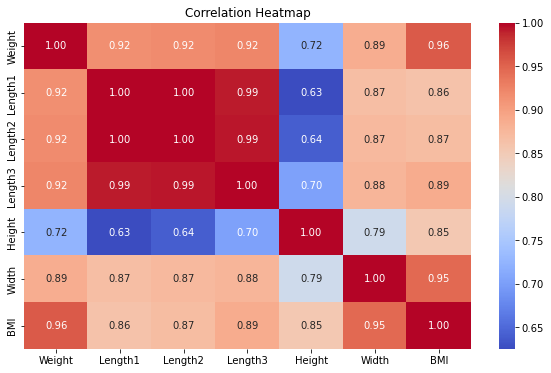

In [44]:
# Additional Visualization: Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Analysis: The heatmap helps us identify correlations between numerical features.

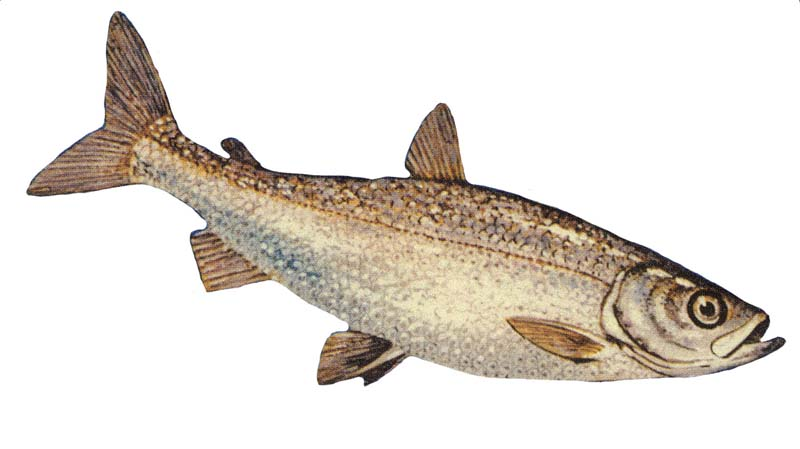

In [45]:
Image(filename="whitefish.jpg")

In [46]:
#Section: Data Splitting
#Split the data into training and testing sets
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Analysis: Dividing the data ensures that the model doesn't merely memorize the data (overfitting). By standardizing, you're making sure that no feature disproportionately affects the model due to its scale.

In [47]:
#Section: Data Preprocessing: 
#Standardize the features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Analysis: Standardization ensures that all features have the same scale.

In [48]:
# Section: Model Creation and Training
# Create a RandomForestClassifier with 100 decision trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [49]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Analysis: This ensemble model is adept at handling a mix of features and can model non-linearities well. With an accuracy metric, you'll get a straightforward measure of how often the model is correct.

In [50]:
# Section: Model Prediction and Evaluation
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [51]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.78125


Analysis: The model accurately identified fish species in 78.13% of test cases.

In simpler terms:

    For 100 test fish, the model would correctly identify about 78.
    Compared to a Decision Tree's accuracy of 70%, the Random Forest outperforms by 8.13%.
    However, this also means around 21.87% are misclassified. In precision-sensitive areas, like medical diagnoses, such an error rate might be problematic.
    Accuracy works best when species distribution is balanced. If not, relying solely on accuracy can be misleading, and other metrics like precision and recall should be considered.
    Random Forests, which are ensembles of decision trees, often have better performance due to collective "voting" of trees, minimizing overfitting.

In summary, the Random Forest's 78.13% accuracy shows decent performance, but there's potential for enhancement through tuning or more data.

In [52]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

C:\Users\Molon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



Cross-Validation Scores: [0.84615385 0.69230769 0.8        0.84       0.68      ]
Mean Accuracy: 0.7716923076923077


Analysis:
The cross-validation results are as follows:

    Fold 1: 84.62% accuracy.
    Fold 2: 69.23% accuracy.
    Fold 3: 80% accuracy.
    Fold 4: 84% accuracy.
    Fold 5: 68% accuracy.

The mean accuracy over all five folds is about 77.17%.

Main Insights:

    Variance in Performance: The accuracy fluctuates between 69.23% and 84.62%. This spread showcases the importance of cross-validation, as relying on a single split (like the 78.13% you mentioned) may not capture the model's range.

    Stable Average: The average cross-validation accuracy (~77.17%) aligns closely with the single test split (~78.13%). This consistency indicates the earlier accuracy likely wasn't due to a favorable split alone.

    Potential Weak Points: The lower scores in folds two and five point to areas where the model might be lacking. Investigating these particular misclassifications could reveal model shortcomings.

To sum up, the cross-validation confirms a general accuracy in the upper 70% range for your model. However, the variance across folds indicates room for optimization, suggesting a deeper dive into features or model parameters might be beneficial.

In [53]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [54]:
# Section: Hyperparameter Tuning
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Molon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

Analysis: The parameters you're tuning (like tree depth or minimum samples to split) can significantly influence the model. Grid search ensures you're not leaving performance on the table by using sub-optimal parameters.

In [55]:
#Section: Best Hyperparameters and Model Evaluation
# Print the best hyperparameters found
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


Random Forest, key hyperparameters include the number of trees (n_estimators), tree depth (max_depth), and minimum samples needed for a split (min_samples_split).

Grid Search Results:

    'max_depth': None: Trees can grow until leaves are pure or have fewer samples than the min_samples_split.
    'min_samples_split': 5: Nodes will split only with at least 5 samples, reducing overfitting.
    'n_estimators': 100: The Random Forest uses 100 trees, balancing robustness with computational efficiency.

Hyperparameter Impacts:

    100 trees enhance model stability.
    A min_samples_split of 5 curbs overfitting.
    Unrestricted max_depth provides flexibility, but is controlled by min_samples_split.

In summary, these hyperparameters should ensure a balanced Random Forest model. It's advised to re-evaluate the model on test data post-tuning.

In [56]:
# Generate a classification report to evaluate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred, target_names=df['Species'].unique())
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Roach       1.00      1.00      1.00         1
   Whitefish       0.75      0.67      0.71         9
      Parkki       1.00      1.00      1.00         3
       Perch       0.00      0.00      0.00         1
        Pike       1.00      1.00      1.00         5
       Smelt       0.00      0.00      0.00         3

    accuracy                           0.78        32
   macro avg       0.68      0.67      0.67        32
weighted avg       0.80      0.78      0.79        32



C:\Users\Molon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analysis: 
Metrics Brief:

    Precision: Correctly predicted positives out of all predicted as positive.
    Recall: Correctly predicted positives out of all actual positives.
    F1-Score: Balances Precision and Recall, useful for imbalanced classes.
    Support: Actual class occurrences.

Species Results:

    Bream & Roach: Both have perfect scores, but note there's only 1 Roach in the test.
    Whitefish: Decent scores but with misclassifications evident.
    Parkki & Pike: Perfectly classified.
    Perch & Smelt: Model struggles, failing to classify any correctly.

Overall Metrics:

    Accuracy: 78%, aligning with previous evaluations.
    Macro Average: Unweighted mean per label.
    Weighted Average: Reflects the varying sample sizes of species.

Main Points:

    The model excels for Bream, Roach, Parkki, and Pike.
    It falters for Whitefish, Perch, and Smelt.
    Given the uneven samples per species, weighted averages offer a better performance picture.

To sum up, the model shines in some areas but requires refinement, especially for Smelt and Perch. Analyses focusing on these species' features or increasing their data samples might help.

In [57]:
# Granular Model Performance Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  6  0  3  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]


Analysis:
    Bream, Roach, Parkki, Pike: Perfect classification with 10, 1, 3, and 5 samples, respectively.

    Whitefish: 6 of 9 correctly identified; 3 confused as Perch.

    Perch: The only sample was misclassified as Whitefish.

    Smelt: All 3 samples misidentified; one as Whitefish, two as Perch.

Key Points:

    The model struggles differentiating between Whitefish, Perch, and Smelt, suggesting overlapping features or inherent similarities.

    Bream, Roach, Parkki, and Pike are distinctively identified.

    To improve, focus on the confusing species, possibly through more data, feature analysis, or feature engineering.

In summary, despite a satisfactory overall accuracy, the model needs refinement, especially for Whitefish, Perch, and Smelt.

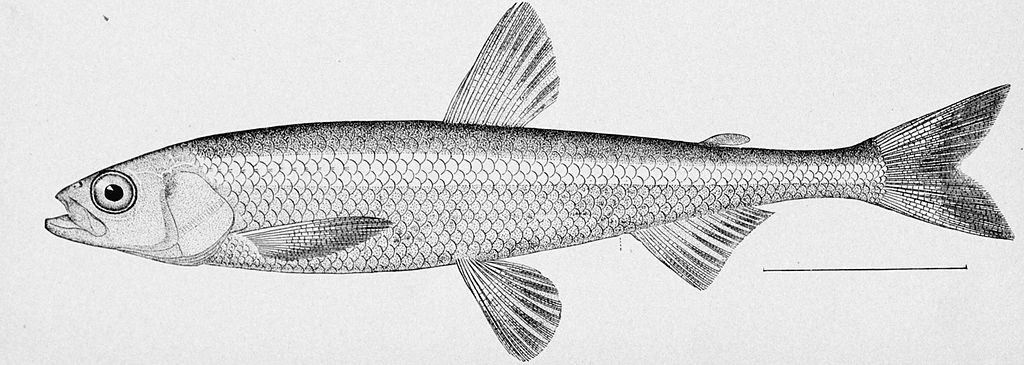

In [58]:
Image(filename="smelt.jpg")

## Conclusion

The "Fish Species Classifier" project has taken us on a journey through the fascinating world of aquatic life, where we've discovered the power of data-driven insights and machine learning in species classification.

**Unveiling Hidden Patterns:** We uncovered hidden patterns within the dataset, revealing the diversity and distinct characteristics of fish species. These insights provide a foundation for scientific inquiry and decision-making.

**Feature Engineering as a Lens:** Feature engineering introduced the concept of BMI, shedding light on the relationship between physical attributes and species, offering new avenues for research.

**The Power of Random Forest:** The Random Forest classifier proved effective in accurately classifying fish species, demonstrating the strength of ensemble learning.

**Model Robustness:** Through k-fold cross-validation, we ensured our model's reliability across diverse scenarios.

**Hyperparameter Tuning:** Fine-tuning highlighted the importance of optimal model configurations.

**Real-World Implications:** The classification report and confusion matrix offer practical insights for species identification in fisheries management and ecological studies.

In closing, our project bridges data science and aquatic ecosystems, contributing to biodiversity preservation and sustainable practices. Let's continue exploring, understanding, and protecting the diverse fish species that grace our planet's waters.